# Wetterbedingungen und weitere Einflüsse auf die Fahrradmobilität in Seattle

## Einleitung

### Verwendete Datenquellen

### Verwendete Programmbibliotheken

In [1]:
# Importieren von Programm-Bibliotheken

# Programm-Bibliothek zur effizienten Bearbeitung von Datentabellen
import pandas as pd

# Programm-Bibliothek zur schnellen Bearbeitung numerischer Tabellendaten
import numpy as np

# Programm-Bibliothek zu grafischen Darstellung von Daten
import matplotlib.pyplot as plt

# Programm-Bibliothek mit weiteren Optionen zur grafischen Darstellung
import seaborn as sns

# Programm für Lineare Regression
from sklearn.linear_model import LinearRegression


# Steuerung der Ausgabe von Grafiken direkt in diesem Notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Laden und erstes Explorieren der Daten *(Gathering, First Exploration)*

### Laden und erstes Explorieren der Verkehrsdaten

In [2]:
Verkehrsdaten = pd.read_csv(
    'Daten/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv'
)

In [3]:
Verkehrsdaten.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,05/31/2019 11:00:00 PM,22.0,35.0
1,05/31/2019 10:00:00 PM,29.0,52.0
2,05/31/2019 09:00:00 PM,46.0,57.0
3,05/31/2019 08:00:00 PM,48.0,92.0
4,05/31/2019 07:00:00 PM,97.0,151.0


In [4]:
Verkehrsdaten.tail()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
58363,10/03/2012 04:00:00 AM,6.0,1.0
58364,10/03/2012 03:00:00 AM,2.0,3.0
58365,10/03/2012 02:00:00 AM,1.0,1.0
58366,10/03/2012 01:00:00 AM,4.0,6.0
58367,10/03/2012 12:00:00 AM,4.0,9.0


In [5]:
Verkehrsdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 3 columns):
Date                            58368 non-null object
Fremont Bridge East Sidewalk    58359 non-null float64
Fremont Bridge West Sidewalk    58359 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [6]:
Verkehrsdaten.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,58368,58368,01/13/2015 03:00:00 AM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fremont Bridge East Sidewalk,58359,NaN,NaN,NaN,52.1382,67.5161,0,6,28,70,698
Fremont Bridge West Sidewalk,58359,NaN,NaN,NaN,58.9453,85.8879,0,7,29,71,745


### *Do-It-Yourself: Laden und erstes Explorieren der Wetterdaten*

In [7]:
Wetterdaten = pd.read_csv('Daten/1786440.csv')

In [8]:
Wetterdaten.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
0,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-03,7.3,NaN,0.0,0.0,0.0,NaN,18.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-04,6.5,NaN,0.0,0.0,0.0,NaN,18.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-05,5.7,NaN,0.0,0.0,0.0,NaN,21.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-06,5.1,NaN,0.0,0.0,0.0,NaN,23.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2012-10-07,1.3,NaN,0.0,0.0,0.0,NaN,23.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Wetterdaten.tail()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
2431,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2019-05-31,2.2,NaN,0.0,0.0,0.0,17.1,24.4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2432,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2019-06-01,2.7,NaN,0.0,0.0,0.0,16.4,24.4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2433,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2019-06-02,3.1,NaN,0.0,0.0,0.0,17.5,23.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2434,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2019-06-03,3.3,NaN,0.0,0.0,0.0,15.6,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2435,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2019-06-04,2.4,NaN,0.0,0.0,0.0,15.8,22.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Wetterdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 27 columns):
STATION    2436 non-null object
NAME       2436 non-null object
DATE       2436 non-null object
AWND       2435 non-null float64
PGTM       52 non-null float64
PRCP       2435 non-null float64
SNOW       2435 non-null float64
SNWD       2435 non-null float64
TAVG       2256 non-null float64
TMAX       2435 non-null float64
TMIN       2435 non-null float64
WDF2       2435 non-null float64
WDF5       2415 non-null float64
WSF2       2435 non-null float64
WSF5       2415 non-null float64
WT01       1050 non-null float64
WT02       123 non-null float64
WT03       17 non-null float64
WT04       2 non-null float64
WT05       3 non-null float64
WT08       83 non-null float64
WT09       1 non-null float64
WT13       104 non-null float64
WT14       19 non-null float64
WT16       129 non-null float64
WT18       6 non-null float64
WT22       9 non-null float64
dtypes: float64(24), object(3)


In [11]:
Wetterdaten.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATION,2436,1,USW00024233,2436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME,2436,1,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE,2436,2436,2012-11-21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWND,2435,NaN,NaN,NaN,3.40234,1.38279,0.4,2.4,3.2,4.3,9.5
PGTM,52,NaN,NaN,NaN,1413.48,728.946,2,1030.75,1440.5,1996.25,2357
PRCP,2435,NaN,NaN,NaN,3.03257,6.66503,0,0,0,3,55.9
SNOW,2435,NaN,NaN,NaN,0.434086,6.34253,0,0,0,0,163
SNWD,2435,NaN,NaN,NaN,0.708419,8.77461,0,0,0,0,180
TAVG,2256,NaN,NaN,NaN,12.2891,5.91813,-4.4,8,11.9,16.9,27.6
TMAX,2435,NaN,NaN,NaN,16.3255,7.40495,-1.6,10.6,15.6,21.7,35.6


## Strukturieren der Daten *(Preprocessing)*

In [12]:
Daten = pd.DataFrame()

### Formattieren und Aggregieren und Hinzufügen der Verkehrsdaten

Zunächst formatieren wir die Spalte 'Date' von 'verkehrsdaten' in ein Format um, dass von 'pandas' als Zeiten interpretiert werden kann.

In [13]:
Verkehrsdaten['Date'] = pd.to_datetime(Verkehrsdaten['Date'])

Dann setzen wir den Index der Tabelle 'verkehrsdaten' auf 'date'

In [14]:
Verkehrsdaten = Verkehrsdaten.set_index('Date')

Um Vergleichbarkeit zu den Wetterdaten zu erreichen, aggregieren wir 

In [15]:
Verkehrsdaten = Verkehrsdaten.resample('d').sum()

In [16]:
Verkehrsdaten.sample(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-12-05,221.0,187.0
2013-07-12,1838.0,1858.0
2018-06-07,1851.0,2864.0
2017-05-02,1624.0,2072.0
2019-02-26,1059.0,1744.0


In [17]:
Verkehrsdaten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2432 entries, 2012-10-03 to 2019-05-31
Freq: D
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    2432 non-null float64
Fremont Bridge West Sidewalk    2432 non-null float64
dtypes: float64(2)
memory usage: 57.0 KB


In [18]:
Verkehrsdaten.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Fremont Bridge East Sidewalk,2432.0,1251.123355,604.790258,19.0,817.0,1191.0,1695.00,3143.0
Fremont Bridge West Sidewalk,2432.0,1414.469161,758.560427,12.0,869.0,1294.0,1993.25,3752.0


In [19]:
Daten['Fahrten'] = Verkehrsdaten['Fremont Bridge East Sidewalk'] + Verkehrsdaten['Fremont Bridge West Sidewalk']

In [20]:
Daten.index = pd.DatetimeIndex(data=Verkehrsdaten.index, name='Datum')

In [21]:
Daten.sample(5)

,Fahrten
Datum,
2013-01-08,1578.0
2016-12-04,916.0
2018-09-23,1735.0
2014-02-23,691.0
2014-12-30,1500.0


### Ermitteln und Hinzufügen berechneter Daten (Tageslänge und Wochentag)

In [22]:
Berechnete_Daten = pd.DataFrame(index=Daten.index)

In [23]:
Berechnete_Daten['Tage'] = np.arange(len(Berechnete_Daten))

In [24]:
def Berechne_Tageslaenge(datum, laengengrad=47.61):
    
    # Neigung der Erdachse in Grad
    neigung_erdachse = 23.44
    
    # Wintersonnenwende
    wintersonnenwende = pd.datetime(2000, 12, 21)
    
    # Tage seit Wintersonnenwende (wsw)
    zeit_seit_wsw = datum - wintersonnenwende
    tage_seit_wsw = zeit_seit_wsw.total_seconds() / (24. * 60. * 60.)
    tage_seit_wsw = tage_seit_wsw % 365.25
    
    m = 1. - \
        np.tan(np.radians(laengengrad)) * \
        np.tan(
            np.radians(neigung_erdachse) * 
            np.cos(tage_seit_wsw * np.pi / 182.625) 
    )
    
    m = max(0, min(m, 2))
    
    tageslaenge = 24. * np.degrees(np.arccos(1 - m)) / 180.
    
    return tageslaenge

In [25]:
Berechnete_Daten['Tageslaenge'] = list(map(Berechne_Tageslaenge, Berechnete_Daten.index))

In [26]:
Berechnete_Daten.sample(5)

,Tage,Tageslaenge
Datum,,
2017-06-27,1728,15.761390
2013-01-04,93,8.351010
2018-02-28,1974,10.687302
2018-04-02,2007,12.613209
2017-08-09,1771,14.404854


In [27]:
#Wochentage = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
#Berechnete_Daten['Wochentag'] = Berechnete_Daten.index.dayofweek + 1
Berechnete_Daten['Werktag'] = 1 - Berechnete_Daten.index.dayofweek // 5
#for i in range(7):
#    Berechnete_Daten[Wochentage[i]] = (Berechnete_Daten.index.dayofweek == i).astype(float)

In [28]:
Berechnete_Daten.sample(5)

,Tage,Tageslaenge,Werktag
Datum,,,
2017-07-29,1760,14.912617,0
2014-06-23,628,15.780240,1
2013-05-12,221,14.770831,0
2018-04-27,2032,14.020464,1
2013-11-20,413,8.842578,1


In [29]:
Daten[['Tage', 'Tageslaenge', 'Werktag']] = Berechnete_Daten[['Tage', 'Tageslaenge', 'Werktag']]

In [30]:
Daten.sample(5)

,Fahrten,Tage,Tageslaenge,Werktag
Datum,,,,
2014-07-26,2710.0,661,15.046390,0
2017-09-08,3637.0,1801,12.759040,1
2017-06-29,4743.0,1730,15.744058,1
2013-07-18,4386.0,288,15.328417,1
2015-03-31,2022.0,909,12.481490,1


### *Do-It-Yourself: Formatieren und Hinzufügen ausgewählter Wetterdaten*

In [31]:
Wetterdaten['DATE'] = pd.to_datetime(Wetterdaten['DATE'])

In [32]:
Wetterdaten = Wetterdaten.set_index('DATE')

In [33]:
Daten['Niederschlag'] = Wetterdaten['PRCP']
Daten['Temp_min'] = Wetterdaten['TMIN']
Daten['Temp_max'] = Wetterdaten['TMAX']

In [34]:
Daten.sample(5)

,Fahrten,Tage,Tageslaenge,Werktag,Niederschlag,Temp_min,Temp_max
Datum,,,,,,,
2017-12-31,734.0,1915,8.283449,0,0.0,0.6,6.1
2016-08-10,4510.0,1407,14.342627,1,0.0,14.4,24.4
2018-04-14,439.0,2019,13.305611,0,43.2,7.2,11.7
2013-01-05,719.0,94,8.370238,0,3.0,4.4,6.7
2015-10-25,902.0,1117,10.079350,0,8.9,8.9,19.4


## Weitere Exploration der Daten *(Exploration)*

In [35]:
Daten = Daten[['Tage', 'Werktag', 'Tageslaenge', 'Niederschlag', 'Temp_min', 'Temp_max', 'Fahrten']]

In [36]:
Daten.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Tage,2432.0,1215.500000,702.202250,0.000000,607.750000,1215.500000,1823.250000,2431.000000
Werktag,2432.0,0.714638,0.451679,0.000000,0.000000,1.000000,1.000000,1.000000
Tageslaenge,2432.0,11.881645,2.598686,8.218894,9.360658,11.775523,14.404854,15.781095
Niederschlag,2431.0,3.037557,6.669381,0.000000,0.000000,0.000000,3.000000,55.900000
Temp_min,2431.0,8.098272,5.005603,-7.100000,4.400000,8.300000,12.200000,20.600000
Temp_max,2431.0,16.314850,7.406162,-1.600000,10.600000,15.600000,21.700000,35.600000
Fahrten,2432.0,2665.592516,1320.023027,38.000000,1750.000000,2499.500000,3697.250000,6183.000000


In [37]:
Daten = Daten.dropna()

In [38]:
Daten.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Tage,2431.0,1215.006582,701.924907,0.000000,607.500000,1215.000000,1822.500000,2431.000000
Werktag,2431.0,0.714521,0.451735,0.000000,0.000000,1.000000,1.000000,1.000000
Tageslaenge,2431.0,11.880411,2.598508,8.218894,9.360658,11.775523,14.398664,15.781095
Niederschlag,2431.0,3.037557,6.669381,0.000000,0.000000,0.000000,3.000000,55.900000
Temp_min,2431.0,8.098272,5.005603,-7.100000,4.400000,8.300000,12.200000,20.600000
Temp_max,2431.0,16.314850,7.406162,-1.600000,10.600000,15.600000,21.700000,35.600000
Fahrten,2431.0,2664.911970,1319.867807,38.000000,1750.000000,2499.000000,3696.500000,6183.000000


In [39]:
def Zeitlicher_Verlauf(Datentabelle, Variable, Mittelungsfenster=1):
    
    assert isinstance(Datentabelle, pd.DataFrame), 'Datentabelle ist kein Pandas-DataFrame!'
    assert Variable in Datentabelle.columns, 'Variable ist nicht in "Daten" enthalten!'
    assert type(Mittelungsfenster) == int, 'Mittelungsfenster ist keine ganze Zahl!'
    assert Mittelungsfenster > 0, 'Mittelungsfenster ist kleiner 1!'
    
    Grafikdaten = Datentabelle.rolling(Mittelungsfenster).mean()
    
    if Mittelungsfenster > 1:
        Zusatz = ' im gleit. ' + str(Mittelungsfenster) + '-Tages-Durchs.'
    else:
        Zusatz = ''
    
    Grafikdaten.plot(
        kind='line', 
        y=Variable, 
        title='Zeitlicher Verlauf von "' + Variable + '"' + Zusatz,
        figsize=(8, 5))
    
    plt.ylabel('"' + Variable + '"' + Zusatz)
    plt.legend().set_visible(False)
    plt.show()
    
    return None

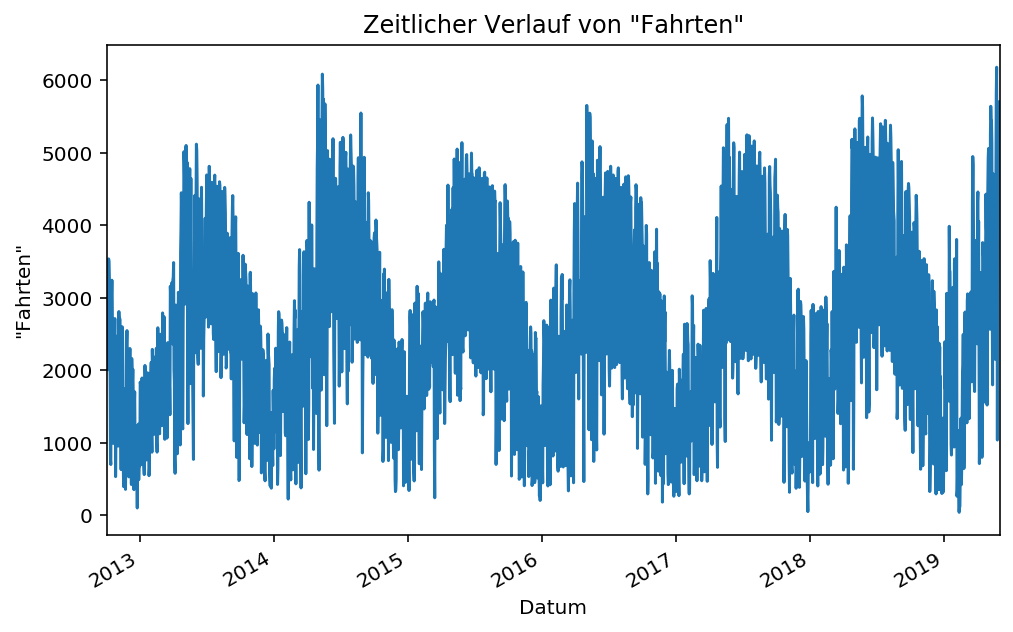

In [40]:
Zeitlicher_Verlauf(Daten, 'Fahrten')

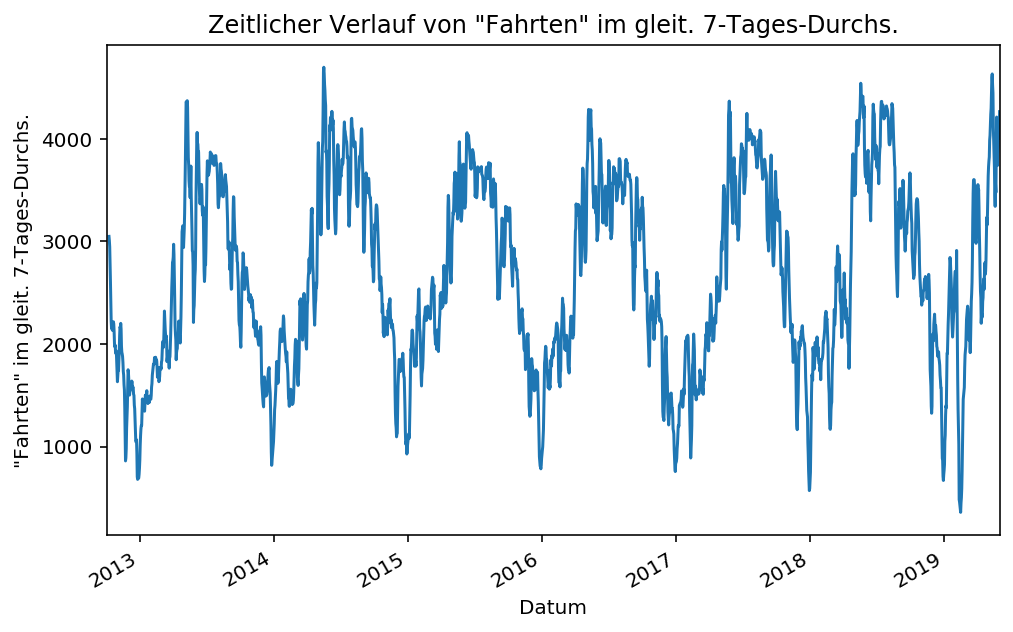

In [41]:
Zeitlicher_Verlauf(Daten, 'Fahrten', Mittelungsfenster=7)

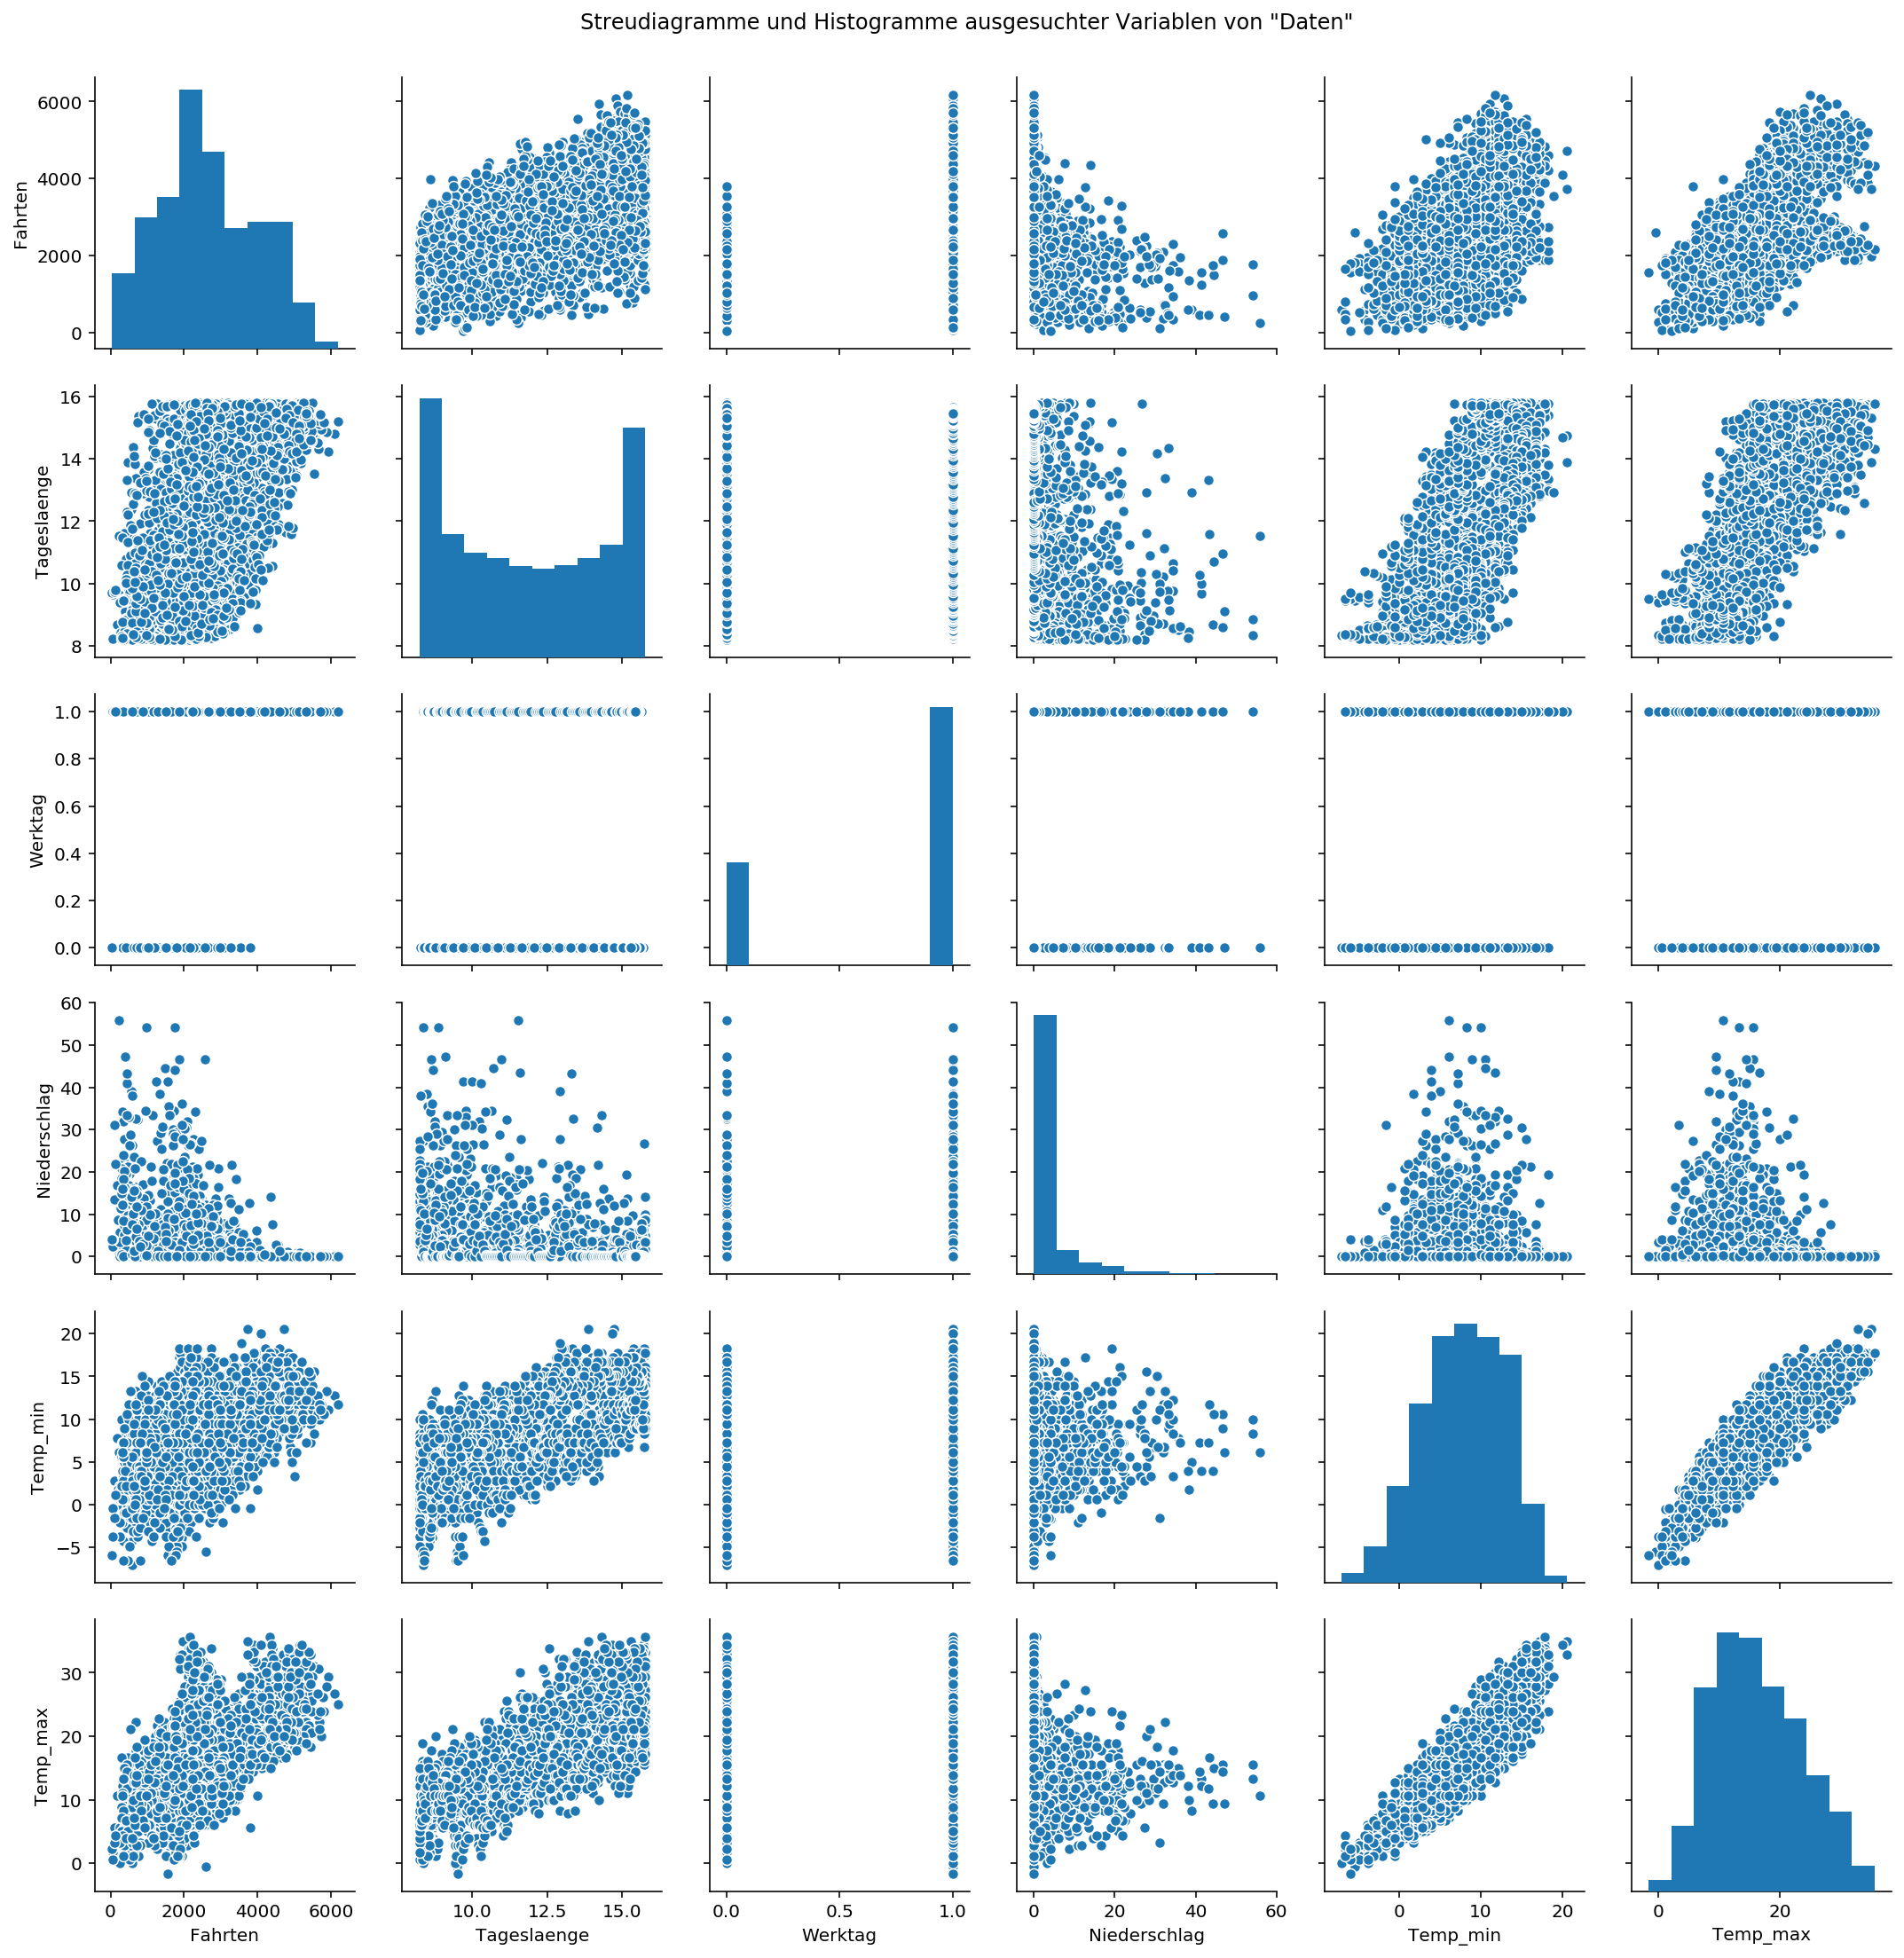

In [42]:
sns.pairplot(
    data=Daten,
    vars=['Fahrten', 'Tageslaenge', 'Werktag', 'Niederschlag', 'Temp_min', 'Temp_max']
)

plt.suptitle('Streudiagramme und Histogramme ausgesuchter Variablen von "Daten"', y=1.02)

plt.show()

In [43]:
def Korrelation(Datentabelle, X_Variable, Y_Variable):
    
    assert isinstance(Datentabelle, pd.DataFrame), 'Datentabelle ist kein Pandas-DataFrame!'
    assert X_Variable in Datentabelle.columns, 'X_Variable ist nicht in "Daten" enthalten!'
    assert Y_Variable in Datentabelle.columns, 'Y_Variable ist nicht in "Daten" enthalten!'
    
    plt.figure(figsize = (8, 8))
    
    sns.regplot(
        x=X_Variable,
        y=Y_Variable,
        data=Datentabelle
    )
    
    plt.title('"' + Y_Variable + '" in Abhängigkeit von "' + X_Variable + '"')
    plt.show()
    
    return None

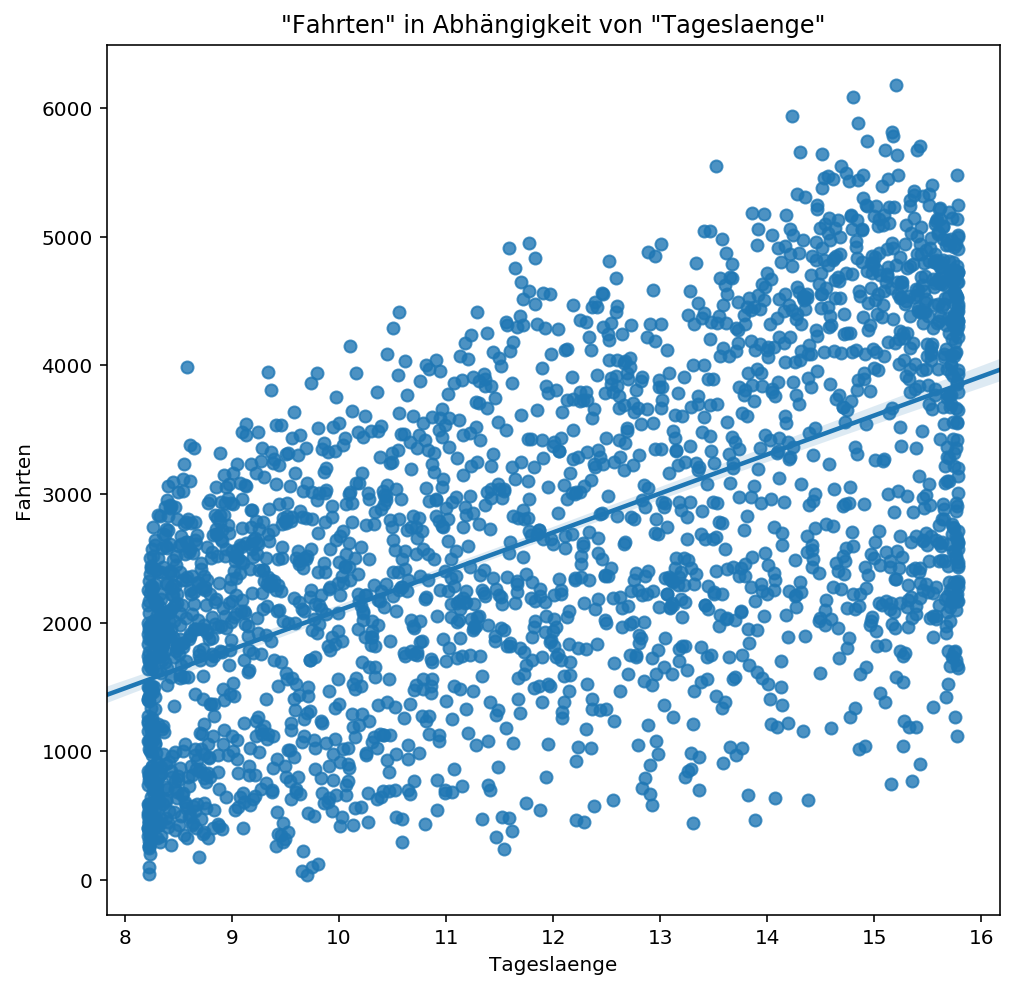

In [44]:
Korrelation(Daten, 'Tageslaenge', 'Fahrten')

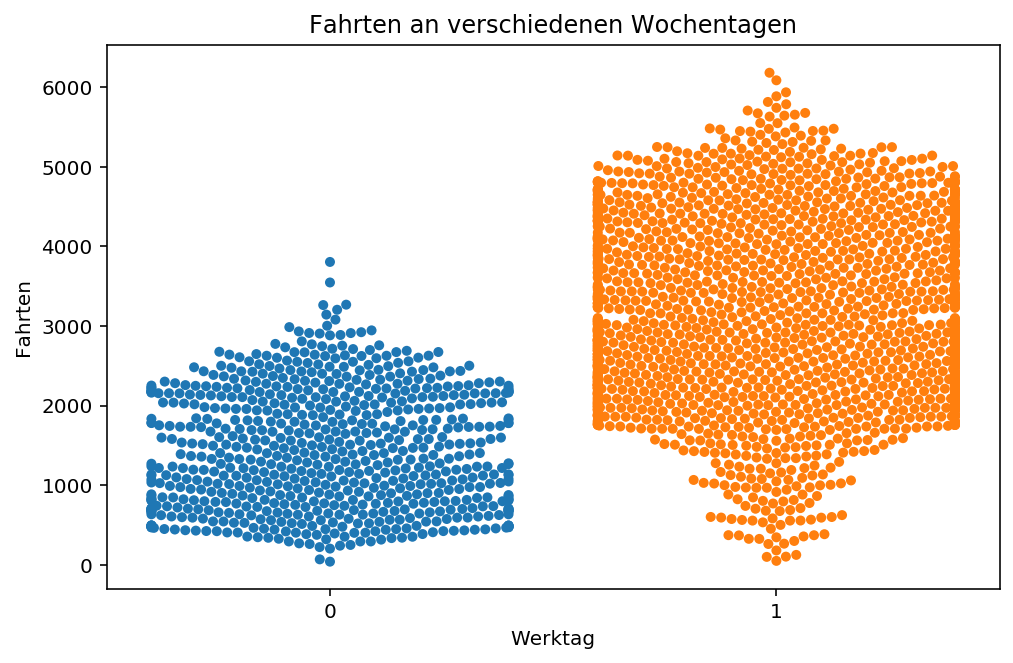

In [45]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Werktag', y='Fahrten', data=Daten)
plt.title('Fahrten an verschiedenen Wochentagen')

plt.show()

## Modellierung der Daten *(Modelling)*

### Lineare Regression - eine kurze Einführung

### Ein einfaches lineares Modell - Abhängigkeit der Fahrten von der Tageslänge

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Tageslaenge']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend']

Gerade_X = np.linspace(Modelldaten['Tageslaenge'].min(), Modelldaten['Tageslaenge'].max())
Gerade_y = LR_Modell.predict(Gerade_X[:, None])

#plt.scatter()

### *Do-It-Yourself: Abhängigkeit der Fahrten von der Temperatur*

### Ein multi-lineares Modell - Abhängigkeit der Fahrten von Tageslänge und Wochentag

### *Do-It-Yourself: Abhängigkeit der Fahrten von Temperatur und Niederschlag*

### Das vollständige multi-lineare Modell

## Ergebnisse

## Einleitung

In [ ]:
verkehr_detailliert = pd.read_csv(
    'Daten/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',
    index_col='Date', 
    parse_dates=True
).reset_index()

In [ ]:
verkehr_detailliert.head(5)

In [ ]:
verkehr_detailliert.columns = ['datum', 'nordwaerts', 'suedwaerts']
verkehr_detailliert['gesamt'] = verkehr_detailliert['nordwaerts'] + verkehr_detailliert['suedwaerts']

In [ ]:
verkehr_detailliert.sample(5)

In [ ]:
verkehr = verkehr_detailliert.resample('d').sum()

In [ ]:
verkehr.sample(5)

In [ ]:
verkehr.plot(
    kind='line',
    y=['nordwaerts', 'suedwaerts', 'gesamt'],
    figsize=(10, 5),
    alpha=0.25
)

plt.title('Täglicher Radverkehr \nüber die Fremont-Brücke in Seattle')
plt.xlabel('Datum')
plt.ylabel('Fahrräder/Woche')

plt.show()

In [ ]:
verkehr.rolling(30).mean().plot(
    y='gesamt',
    figsize=(10, 5)
)

plt.title('Täglicher Radverkehr im gleitenden Durchschnitt (30 Tage)\nüber die Fremont-Brücke in Seattle')
plt.xlabel('Datum')
plt.ylabel('Fahrräder/Tag (gleitender Durchschnitt)')
plt.legend().set_visible(False)

plt.show()

In [ ]:
verkehr.rolling(365).mean().plot(
    y='gesamt',
    figsize=(10, 5)
)

plt.title('Täglicher Radverkehr im gleitenden Durchschnitt (365 Tage)\nüber die Fremont-Brücke in Seattle')
plt.xlabel('Datum')
plt.ylabel('Fahrräder/Tag (gleitender Durchschnitt)')
plt.legend().set_visible(False)

plt.show()

## Saisonaler Einfluss der Tageslicht-Stunden

In [ ]:
def berechne_tageslichtstunden(datum, laengengrad=47.61):
    
    # Neigung der Erdachse in Grad
    neigung_erdachse = 23.44
    
    # Wintersonnenwende
    wintersonnenwende = pd.datetime(2000, 12, 21)
    
    # Tage seit Wintersonnenwende (wsw)
    zeit_seit_wsw = datum - wintersonnenwende
    tage_seit_wsw = zeit_seit_wsw.total_seconds() / (24. * 60. * 60.)
    tage_seit_wsw = tage_seit_wsw % 365.25
    
    m = 1. - \
        np.tan(np.radians(laengengrad)) * \
        np.tan(
            np.radians(neigung_erdachse) * 
            np.cos(tage_seit_wsw * np.pi / 182.625) 
    )
    
    m = max(0, min(m, 2))
    
    tageslichtstunden = 24. * np.degrees(np.arccos(1 - m)) / 180.
    
    return tageslichtstunden

In [ ]:
verkehr['tageslicht'] = list(map(berechne_tageslichtstunden, verkehr.index))

In [ ]:
verkehr.plot(
    kind='line',
    y='tageslicht',
    figsize=(10, 5)
)

plt.title(
    'Tageslicht-Stunden im zeitlichen Verlauf' + 
    '\n' + 
    'bei der Fremont-Brücke in Seattle'
)
plt.xlabel('Datum')
plt.ylabel('Tageslichtstunden')
plt.legend().set_visible(False)

plt.show()

In [ ]:
verkehr.plot(
    kind='scatter', 
    x='tageslicht',
    y='gesamt',
    figsize=(10, 5)
)

plt.title(
    'Täglicher Radverkehr über die Fremont-Brücke in Seattle' + 
    '\n' + 
    'im Verhältnis zu Tageslicht-Stunden'
)
plt.xlabel('Tageslicht Stunden')
plt.xlim(8, 16)
plt.ylabel('Fahrräder/Tag')

plt.show()

In [ ]:
X = verkehr[['tageslicht']].to_dense()
y = verkehr['gesamt']

lineare_regression = LinearRegression(fit_intercept=True).fit(X, y)

verkehr['tageslicht_trend'] = lineare_regression.predict(X)
verkehr['gesamt_adjustiert_um_tageslicht'] = \
    verkehr['gesamt'] - \
    verkehr['tageslicht_trend'] + \
    verkehr['tageslicht_trend'].mean()

xfit = np.linspace(7, 17)
yfit = lineare_regression.predict(xfit[:, None])

verkehr.plot(
    kind='scatter',
    x='tageslicht',
    y='gesamt',
    figsize=(10, 5)
)

plt.plot(xfit, yfit, '-k')

plt.title(
    'Täglicher Radverkehr über die Fremont-Brücke in Seattle' +
    '\n' +
    'im Verhältnis zu Tageslicht-Stunden'
)
plt.xlabel('Tageslicht Stunden')
plt.xlim(8, 16)
plt.ylabel('Fahrräder/Tag')

plt.show()

## Saisonaler Einfluss der Wochentage

In [ ]:
wochentage = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
verkehr['wochentag'] = verkehr.index.dayofweek

In [ ]:
dverkehr_wochentage = verkehr.groupby('wochentag')['gesamt'].mean()
dverkehr_wochentage.index = wochentage

dverkehr_wochentage.plot(
    kind='line',
    y='wochentag'
)

plt.title(
    'Durchschnittlicher Radverkehr nach Wochentagen' + 
    '\n' + 
    'auf der Fremont-Brücke in Seattle'
)
plt.xlabel('Wochentag')
plt.ylabel('Fahrräder/Tag (Durchschnitt)');

In [ ]:
# Add one-hot indicators of weekday
for i in range(7):
    verkehr[wochentage[i]] = (verkehr.index.dayofweek == i).astype(float)

# de-trend on days of the week and daylight together
X = verkehr[wochentage + ['tageslicht']]
y = verkehr['gesamt']
lineare_regression = LinearRegression().fit(X, y)

verkehr['wochentag_trend'] = lineare_regression.predict(X)

verkehr.plot(
    kind='line',
    y = ['gesamt', 'wochentag_trend'],
    figsize=(10, 5),
    alpha=0.5
)

plt.title(
    'Täglicher Radverkehr über die Fremont-Brücke in Seattle' +
    '\n' +
    'im Vergleich zum Tageslicht/Wochentags-Trend'
)
plt.xlabel('Datum')
plt.ylabel('Fahrräder/Tag')

plt.show()

In [ ]:
verkehr['gesamt_adjustiert_um_wochentage'] = \
    verkehr['gesamt'] - \
    verkehr['wochentag_trend'] + \
    verkehr['wochentag_trend'].mean()

print("rms = {0:.0f}".format(np.std(verkehr['gesamt_adjustiert_um_wochentage'])))

verkehr.plot(
    kind='line',
    y='gesamt_adjustiert_um_wochentage',
    figsize=(10, 5)
)

plt.show()

## Einfluss von Temperatur und Niederschlag

## Gesamtmodell